## Analysis Airbnb ##

Notes: 
- listing_id is for property

### import libraries ###

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### load data ###


In [3]:
# As of Jan 1, 2022, we can find 11 AirBnb data sets on http://insideairbnb.com/get-the-data.html, 
# which were scrapped one time per month between Dec 2020 and Nov 2021, with May 2021 skipped. 
# The 11 datasets where downloaded and put in 11 folders. The foler names are shown below.
FOLDERS = ['data_airbnb_syd/20201214/',
           'data_airbnb_syd/20210110/',
           'data_airbnb_syd/20210208/',
           'data_airbnb_syd/20210304/',
           'data_airbnb_syd/20210410/',
           'data_airbnb_syd/20210605/',
           'data_airbnb_syd/20210705/',
           'data_airbnb_syd/20210807/',
           'data_airbnb_syd/20210908/',
           'data_airbnb_syd/20211009/',
           'data_airbnb_syd/20211106/']

In [6]:
df_bnb_cal_detailed = pd.read_csv("./data_airbnb_syd/20211106/calendar_detailed.csv", header='infer')
#df_bnb_cal_detailed.head()

In [7]:
df_bnb_listings_detailed = pd.read_csv("./data_airbnb_syd/20211106/listings_detailed.csv", header='infer')
#df_bnb_listings_detailed

In [8]:
df_bnb_listings_summary = pd.read_csv("./data_airbnb_syd/20211106/listings.csv", header='infer')
#df_bnb_listings_summary

In [9]:
df_bnb_reviews_detailed = pd.read_csv("./data_airbnb_syd/20211106/reviews_detailed.csv", header='infer')
#df_bnb_reviews_detailed.head(2)

In [10]:
#df_bnb_reviews_detailed.describe()

In [11]:
df_bnb_reviews_summary = pd.read_csv("./data_airbnb_syd/20211106/reviews.csv", header='infer')
#df_bnb_reviews_summary.head(2)

In [12]:
#df_bnb_reviews_summary.describe()

### look into calendar data ###

In [14]:
df_bnb_cal_detailed.describe(include='all')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
count,7.486888e+06,7486888,7486888,7486717,7486717,7.486886e+06,7.486886e+06
unique,NaN,366,2,2305,2315,NaN,NaN
top,NaN,2022-10-30,f,$150.00,$150.00,NaN,NaN
freq,NaN,20513,5441082,247266,245590,NaN,NaN
mean,2.665803e+07,NaN,NaN,NaN,NaN,6.431588e+01,1.639367e+06
std,1.441626e+07,NaN,NaN,NaN,NaN,5.218314e+01,5.929355e+07
min,1.115600e+04,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00
25%,1.456135e+07,NaN,NaN,NaN,NaN,5.000000e+00,1.125000e+03
50%,2.598800e+07,NaN,NaN,NaN,NaN,9.000000e+01,1.125000e+03
75%,3.980829e+07,NaN,NaN,NaN,NaN,9.000000e+01,1.125000e+03


In [13]:
df_bnb_cal_detailed['date'] = pd.to_datetime(df_bnb_cal_detailed['date'])
#df_bnb_cal_detailed.head()

In [14]:
#df_bnb_cal_detailed.info()

In [19]:
#df_bnb_cal_detailed['date'].value_counts()

In [16]:
#df_bnb_cal_detailed[df_bnb_cal_detailed['listing_id'] == 837264]

In [17]:
#df_bnb_cal_detailed[(df_bnb_cal_detailed['listing_id'] == 837264) & (df_bnb_cal_detailed['available'] == 't')]

In [18]:
#df_bnb_cal_detailed[(df_bnb_cal_detailed['listing_id'] == 837264) & (df_bnb_cal_detailed['available'] == 'f')]

In [ ]:
df_bnb_cal_detailed[df_bnb_cal_detailed['available']=='t'].groupby('date')['available'].count()

In [ ]:
df_bnb_cal_detailed[df_bnb_cal_detailed['available']=='f'].groupby('date')['available'].count()

In [20]:
df_bnb_cal_2 = df_bnb_cal_detailed[df_bnb_cal_detailed['available']=='f'].groupby('date').count()
df_bnb_cal_2.reset_index(inplace=True)
#df_bnb_cal_2

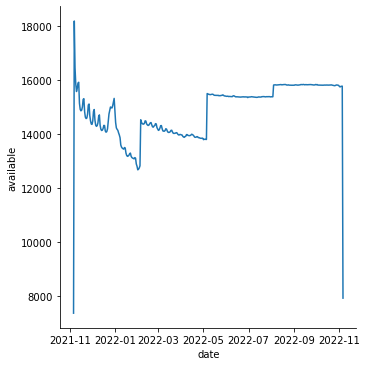

In [21]:
sns.relplot(data=df_bnb_cal_2, x='date', y='available', kind='line')

In [22]:
df_bnb_cal_detailed_20201214 = pd.read_csv("./data_airbnb_syd/20201214/calendar_detailed.csv", header='infer')

In [23]:
#df_bnb_cal_detailed_20201214.describe(include='all')

In [24]:
#df_bnb_cal_detailed_20201214

In [25]:
#df_bnb_cal_detailed_20201214['listing_id'].unique().shape

In [26]:
#12365996 / 33871

In [27]:
#(df_bnb_cal_detailed['available']=='f').sum()

In [28]:
import os
available_count = []
unavailabe_count = []
for folder in FOLDERS:
    date_label = folder.split('/')[1]
    file_path = os.path.join(folder, 'calendar_detailed.csv') 
    df_temp = pd.read_csv(file_path, header='infer')
    available_count.append((date_label, (df_temp['available']=='t').sum()))
    unavailabe_count.append((date_label, (df_temp['available']=='f').sum()))

In [29]:
df_availability = pd.DataFrame({'date': [d for d, _ in available_count],
                                'available': [n for _, n in available_count],
                                'unavailable': [n for _, n in unavailabe_count]})
df_availability

,date,available,unavailable
0,20201214,3061408,9304588
1,20210110,3189914,9191779
2,20210208,3133942,9143054
3,20210304,3031163,9099174
4,20210410,3031163,9099174
5,20210605,2836151,8876041
6,20210705,2859163,8783975
7,20210807,2886912,8706961
8,20210908,2754817,8571136
9,20211009,2610491,8416291


In [30]:
df_availability['diff_unava_and_ava'] = df_availability['unavailable'] - df_availability['available']
#df_availability

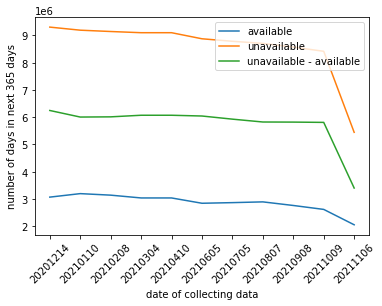

In [31]:


fig, ax = plt.subplots()
plt.xticks(rotation=45)
ax = sns.lineplot(data=df_availability, x='date', y='available', label='available')
ax2 = sns.lineplot(data=df_availability, x='date', y='unavailable', label='unavailable')
ax3 = sns.lineplot(data=df_availability, x='date', y='diff_unava_and_ava', label='unavailable - available')
plt.xlabel('date of collecting data')
plt.ylabel('number of days in next 365 days')
plt.legend()

In [32]:
df_availability['available_ratio'] = df_availability['available'] / (df_availability['available'] + df_availability['unavailable'])
#df_availability

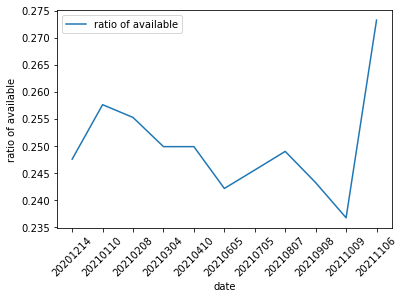

In [33]:
fig, ax = plt.subplots()
plt.xticks(rotation=45)
ax = sns.lineplot(data=df_availability, x='date', y='available_ratio', label='ratio of available')
plt.xlabel('date')
plt.ylabel('ratio of available')
plt.legend()

### look into listing.csv and listing.csv.gz ###
- File listing.csv is summary information and metrics for listings in Sydney (good for visualisations). Fields:
    - listing_id
    - id
    - date
    - reviewer_id
    - reviewer_name
    - comments
- File listing.csv.gz is detailed information for listings in Sydney. Fields:
    - id:  &ensp; integer &ensp; Airbnb's unique identifier for the listing
    - name: &ensp;string		
    - host_id: &ensp;integer		
    - host_name: &ensp;string		
    - neighbourhood_group:	&ensp;text	&ensp;Calculated	&ensp;The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
    - neighbourhood:	&ensp;text	&ensp;Calculated	&ensp;The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
    - latitude:	&ensp;numeric		&ensp;Uses the World Geodetic System (WGS84) projection for latitude and longitude.
    - longitude:&ensp;			&ensp;Uses the World Geodetic System (WGS84) projection for latitude and longitude.
    - room_type:&ensp;	string		
    - price:&ensp;	currency		&ensp;daily price in local currency. Note, $ sign may be used despite locale
    - minimum_nights:&ensp;	integer		&ensp;minimum number of night stay for the listing (calendar rules may be different)
    - number_of_reviews:&ensp;	integer		&ensp;The number of reviews the listing has
    - last_review:	&ensp;date	&ensp;Calculated	&ensp;The date of the last/newest review
    - calculated_host_listings_count:	&ensp; integer	&ensp; Calculated 	&ensp;The number of listings the host has in the current scrape, in the city/region geography.
    - availability_365:&ensp;	integer &ensp;	Calculated	&ensp; avaliability_x. &ensp; The availability of the listing x days in the future as determined by the calendar. Note a listing may be available because it has been booked by a guest or blocked by the host.
    - number_of_reviews_ltm:&ensp;	integer	&ensp;Calculated	&ensp;&ensp;The number of reviews the listing has (in the last 12 months)
    - license:&ensp;	string		
- One row per property; properties are unique in file.


In [34]:
df_listings_summary_20211106 = pd.read_csv("./data_airbnb_syd/20211106/listings.csv", header='infer')


In [ ]:
df_listings_summary_20211106.head()

In [ ]:
df_listings_summary_20211106.describe(include='all')

In [ ]:
print('number of properties {}'.format(df_listings_summary_20211106['id'].unique().shape[0]))
print('number of hosts {}'.format(df_listings_summary_20211106['host_id'].unique().shape[0]))

In [35]:
df_listing_neighbourhood = df_listings_summary_20211106.groupby('neighbourhood')['id', 'host_id'].nunique()
df_listing_neighbourhood.reset_index(inplace=True)
#df_listing_neighbourhood

<ipython-input-35-ddd5c519601f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_listing_neighbourhood = df_listings_summary_20211106.groupby('neighbourhood')['id', 'host_id'].nunique()


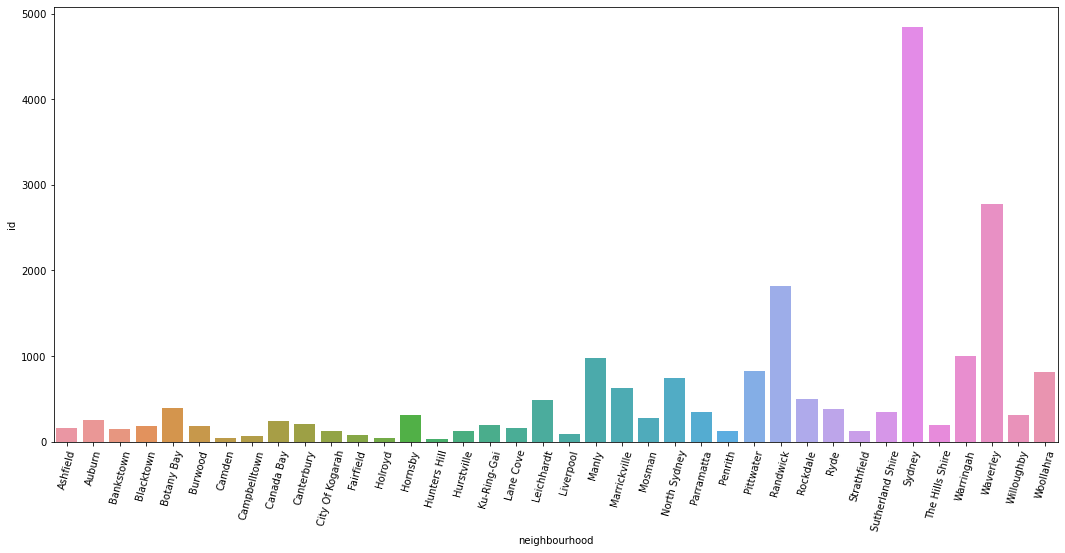

In [36]:
fig, ax = plt.subplots(figsize=(18, 8))
plt.xticks(rotation=75)
ax = sns.barplot(data=df_listing_neighbourhood,
                 x='neighbourhood', y='id')

In [ ]:
df_listings_summary_20201214 = pd.read_csv("./data_airbnb_syd/20201214/listings.csv", header='infer')
df_listings_summary_20201214['id'].unique().shape

In [ ]:
print('number of properties {}'.format(df_listings_summary_20201214['id'].unique().shape[0]))
print('number of hosts {}'.format(df_listings_summary_20201214['host_id'].unique().shape[0]))

In [37]:
import os
property_numbers = []
host_numbers = []
for folder in FOLDERS:
    date_label = folder.split('/')[1]
    file_path = os.path.join(folder, 'listings.csv') 
    df_temp = pd.read_csv(file_path, header='infer')
    property_numbers.append((date_label, df_temp['id'].unique().shape[0]))
    host_numbers.append((date_label, df_temp['host_id'].unique().shape[0]))


In [38]:
property_numbers

[('20201214', 33871),
 ('20210110', 33902),
 ('20210208', 33630),
 ('20210304', 33229),
 ('20210410', 33229),
 ('20210605', 32079),
 ('20210705', 31899),
 ('20210807', 31764),
 ('20210908', 31030),
 ('20211009', 30223),
 ('20211106', 20513)]

In [39]:
host_numbers

[('20201214', 25321),
 ('20210110', 25097),
 ('20210208', 24965),
 ('20210304', 24759),
 ('20210410', 24759),
 ('20210605', 24055),
 ('20210705', 23913),
 ('20210807', 23799),
 ('20210908', 23467),
 ('20211009', 22980),
 ('20211106', 14977)]

In [41]:
df_property_host_numbers = pd.DataFrame({'date': [d for d, _ in property_numbers],
                                         'property_number': [n for _, n in property_numbers],
                                         'host_number': [n for _, n in host_numbers]})

In [ ]:
#import matplotlib.pyplot as plt

#plt.xticks(rotation=45)
#plt.title('Property and Host numbers 2020 Dec - 2021 Nov')
#
#plt.plot(df_property_host_numbers['date'], df_property_host_numbers['property_number'], label='Property Number')
#plt.plot(df_property_host_numbers['date'], df_property_host_numbers['host_number'], label='Host Number')
#
#plt.legend()


In [119]:
#sns.relplot(data=df_property_host_numbers, kind='line')

In [112]:
#pd.melt(df_property_host_numbers, 
#        id_vars=['date'], 
#        value_vars=['property_number', 'host_number'],
#        var_name='number',
#       )

In [113]:
#sns.relplot(data=pd.melt(df_property_host_numbers, 
#                         id_vars=['date'], 
#                         value_vars=['property_number', 'host_number'],
#                         var_name='type',
#                         value_name='number'), 
#            x='date', 
#            y='number', 
#            hue='type', 
#            kind='line')

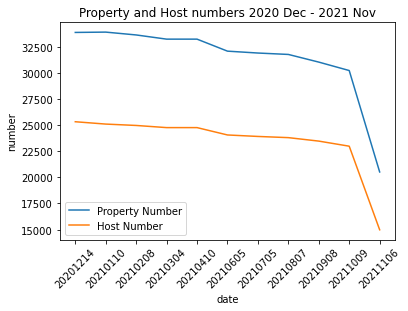

In [42]:
fig, ax = plt.subplots()
plt.title('Property and Host numbers 2020 Dec - 2021 Nov')
plt.xticks(rotation=45)
ax = sns.lineplot(data=df_property_host_numbers, x='date', y='property_number', label='Property Number')
ax1 = sns.lineplot(data=df_property_host_numbers, x='date', y='host_number', label='Host Number')
plt.xlabel('date')
plt.ylabel('number')
plt.legend()


### look into reviews.csv ###
- summary of reviews

### look into neighbourhoods.csv and neighbourhoods.geojson ###
- neighbourhoods.csv is a list of suburb names within Great Sydney area
- neighbourhoods.geojson present the borders of each suburb in form of lists of geo coordinates

In [130]:
df_neighbourhoods_csv = pd.read_csv('./data_airbnb_syd/20210110/neighbourhoods.csv', header='infer')
df_neighbourhoods_csv.head()

,neighbourhood_group,neighbourhood
0,NaN,Ashfield
1,NaN,Auburn
2,NaN,Bankstown
3,NaN,Blacktown
4,NaN,Botany Bay


In [131]:
df_neighbourhoods_csv.count()

neighbourhood_group     0
neighbourhood          38
dtype: int64

In [132]:
df_neighbourhoods_csv

,neighbourhood_group,neighbourhood
0,NaN,Ashfield
1,NaN,Auburn
2,NaN,Bankstown
3,NaN,Blacktown
4,NaN,Botany Bay
5,NaN,Burwood
6,NaN,Camden
7,NaN,Campbelltown
8,NaN,Canada Bay
9,NaN,Canterbury


In [135]:
df_neighbourhoods_geo = pd.read_json('./data_airbnb_syd/20210110/neighbourhoods.geojson')
df_neighbourhoods_geo.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


In [139]:
print(df_neighbourhoods_geo.iloc[0])
print(df_neighbourhoods_geo.iloc[0]['features'])


type                                        FeatureCollection
features    {'type': 'Feature', 'geometry': {'type': 'Mult...
Name: 0, dtype: object
{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[151.296135, -33.572925], [151.296182, -33.572926], [151.296229, -33.572924], [151.29629, -33.572916], [151.296352, -33.572902], [151.296413, -33.572885], [151.296474, -33.572867], [151.296535, -33.572852], [151.296612, -33.572841], [151.296692, -33.572834], [151.29677, -33.572827], [151.296844, -33.572812], [151.296911, -33.572785], [151.296966, -33.572739], [151.297012, -33.572678], [151.297054, -33.572612], [151.297099, -33.572548], [151.297152, -33.572495], [151.297275, -33.572431], [151.297422, -33.572394], [151.297582, -33.572377], [151.297746, -33.572373], [151.297903, -33.572372], [151.298123, -33.572383], [151.298347, -33.572415], [151.29857, -33.572467], [151.298785, -33.572537], [151.298988, -33.572624], [151.299111, -33.57269], [151.299228, -33.572765], [1